In [1]:
"""
Marketing Campaign Analysis
This script performs Exploratory Data Analysis (EDA) and hypothesis testing
on a marketing dataset, aligning with the Four Ps of Marketing.
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# ==============================================================================
# Step 1: Data Import and Initial Verification
# ==============================================================================
print("--- Step 1: Data Import and Cleaning ---")
# Load the dataset
df = pd.read_csv('marketing_data.csv')

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Verification of 'Income' - remove '$' and ',' then convert to float
df['Income'] = df['Income'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Verification of 'Dt_Customer' - convert to datetime using correct format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y', errors='coerce')

print("First 5 rows of Dt_Customer and Income:")
print(df[['Dt_Customer', 'Income']].head())
print("\n")

--- Step 1: Data Import and Cleaning ---
First 5 rows of Dt_Customer and Income:
  Dt_Customer   Income
0  2014-06-16  84835.0
1  2014-06-15  57091.0
2  2014-05-13  67267.0
3  2014-05-11  32474.0
4  2014-04-08  21474.0




In [3]:
# ==============================================================================
# Step 2: Data Cleaning and Missing Value Imputation
# ==============================================================================
print("--- Step 2: Data Cleaning & Imputation ---")
# Marital_Status: Group "Alone", "YOLO", "Absurd" into "Single"
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single')

# Impute Missing Income based on Education and Marital_Status average
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

print("Missing values in Income after imputation:", df['Income'].isnull().sum())
print("\n")

--- Step 2: Data Cleaning & Imputation ---
Missing values in Income after imputation: 0




In [4]:
# ==============================================================================
# Step 3: Feature Engineering
# ==============================================================================
print("--- Step 3: Feature Engineering ---")
# Total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Age (using 2021 as a standard reference year for this dataset)
df['Age'] = 2021 - df['Year_Birth']

# Total Spending
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[products].sum(axis=1)

# Total Purchases across all channels
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

print("Engineered Features preview:")
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())
print("\n")

--- Step 3: Feature Engineering ---
Engineered Features preview:
   Total_Children  Age  Total_Spending  Total_Purchases
0               0   51            1190               14
1               0   60             577               17
2               1   63             251               10
3               2   54              11                3
4               1   32              91                6




--- Step 4: Outlier Treatment ---


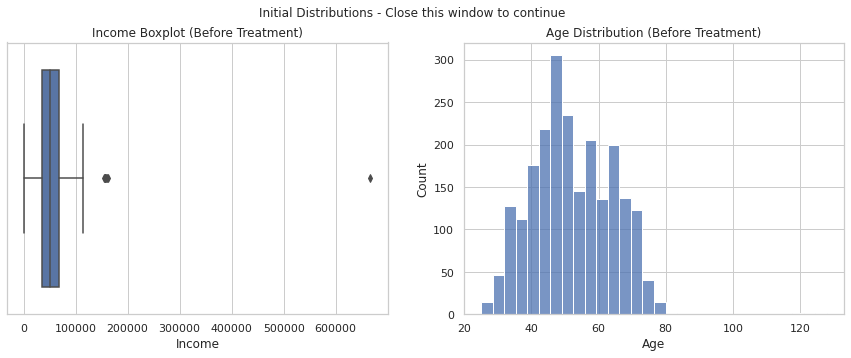

Shape of dataset after outlier removal: (2214, 32)




In [5]:
# ==============================================================================
# Step 4: Distributions and Outlier Treatment
# ==============================================================================
print("--- Step 4: Outlier Treatment ---")
sns.set_theme(style="whitegrid")

# Plot before treatment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Income'], ax=axes[0]).set_title('Income Boxplot (Before Treatment)')
sns.histplot(df['Age'], bins=30, ax=axes[1]).set_title('Age Distribution (Before Treatment)')
plt.suptitle("Initial Distributions - Close this window to continue")
plt.show()

# Outlier treatment: Cap Income at the 99th percentile and remove improbable ages
income_cap = df['Income'].quantile(0.99)
df = df[df['Income'] <= income_cap]
df = df[df['Age'] < 100]

print("Shape of dataset after outlier removal:", df.shape)
print("\n")

--- Step 5 & 6: Encoding & Correlation ---


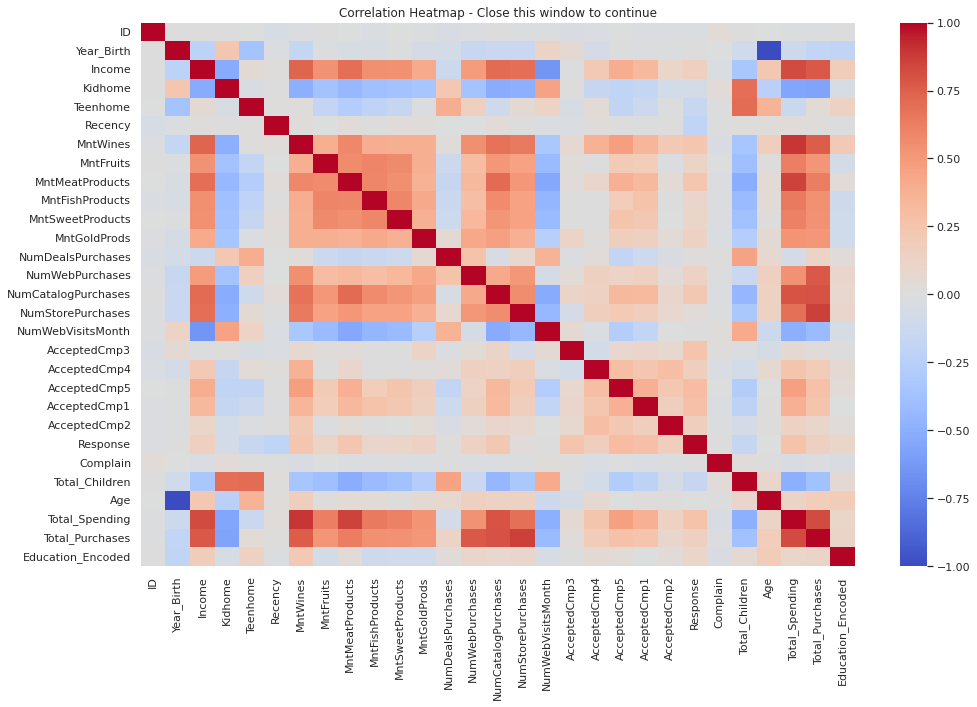

In [6]:
# ==============================================================================
# Step 5 & 6: Encoding and Correlation Heatmap
# ==============================================================================
print("--- Step 5 & 6: Encoding & Correlation ---")
# Ordinal Encoding for Education
edu_map = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education_Encoded'] = df['Education'].map(edu_map)

# One-Hot Encoding (Creating a separate encoded df for specific ML models if needed)
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Country'])

# Heatmap of correlations (using numerical columns only)
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 10))
sns.heatmap(num_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Close this window to continue')
plt.show()

In [7]:
# ==============================================================================
# Step 7: Hypothesis Testing
# ==============================================================================
print("--- Step 7: Hypothesis Testing ---")

# a. Age vs. Store Shopping (Correlation)
age_store_corr = df['Age'].corr(df['NumStorePurchases'])
print(f"a. Correlation between Age and Store Purchases: {age_store_corr:.2f}")

# b. Children vs. Online Shopping (Correlation)
child_web_corr = df['Total_Children'].corr(df['NumWebPurchases'])
print(f"b. Correlation between Total Children and Web Purchases: {child_web_corr:.2f}")

# c. Cannibalization (Store vs Web/Catalog)
store_web_corr = df['NumStorePurchases'].corr(df['NumWebPurchases'])
store_cat_corr = df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(f"c. Correlation between Store and Web: {store_web_corr:.2f} | Store and Catalog: {store_cat_corr:.2f}")

# d. US vs Rest of the World (T-test)
us_purchases = df[df['Country'] == 'US']['Total_Purchases']
row_purchases = df[df['Country'] != 'US']['Total_Purchases']
t_stat, p_val = ttest_ind(us_purchases, row_purchases)
print(f"d. US vs ROW Total Purchases T-test p-value: {p_val:.4f}")
print("\n")

--- Step 7: Hypothesis Testing ---
a. Correlation between Age and Store Purchases: 0.14
b. Correlation between Total Children and Web Purchases: -0.14
c. Correlation between Store and Web: 0.51 | Store and Catalog: 0.56
d. US vs ROW Total Purchases T-test p-value: 0.1877




--- Step 8: Generating Final Business Visualizations ---
Close each plot window to view the next one.


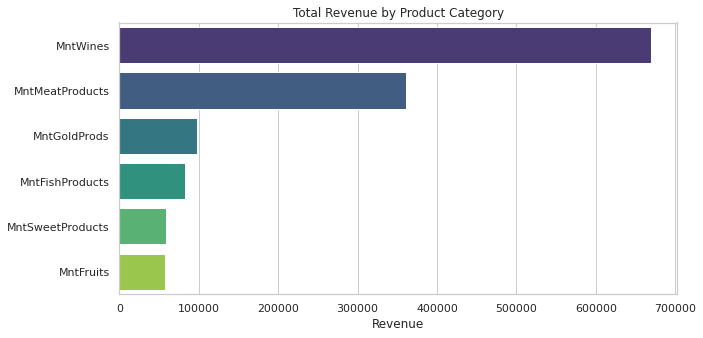

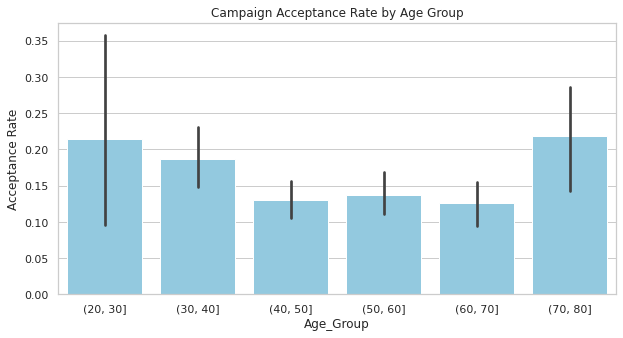

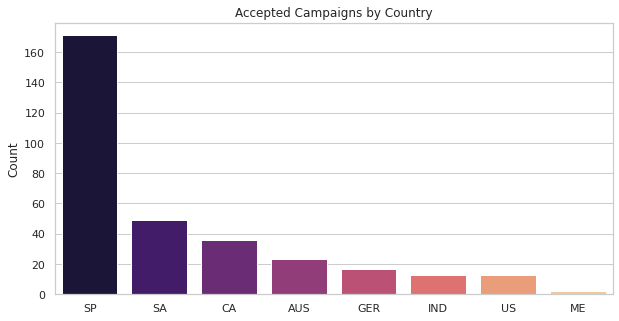

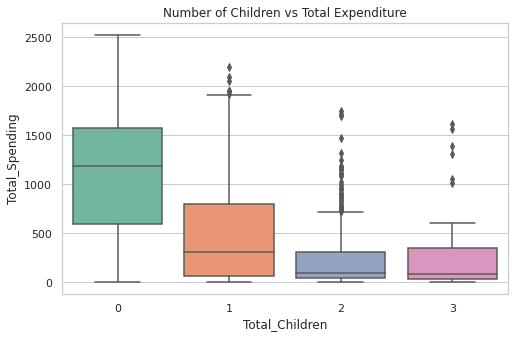

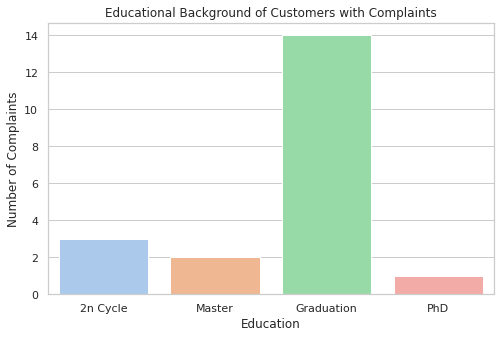

Analysis Complete.


In [8]:
# ==============================================================================
# Step 8: Final Visual Analysis
# ==============================================================================
print("--- Step 8: Generating Final Business Visualizations ---")
print("Close each plot window to view the next one.")

# 8a: Top performing products
product_sums = df[products].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=product_sums.values, y=product_sums.index, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue')
plt.show()

# 8b: Age vs. Campaign Acceptance
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Response', data=df, color='skyblue')
plt.title('Campaign Acceptance Rate by Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

# 8c: Country with highest accepted campaigns
plt.figure(figsize=(10, 5))
resp_counts = df[df['Response'] == 1]['Country'].value_counts()
sns.barplot(x=resp_counts.index, y=resp_counts.values, palette='magma')
plt.title('Accepted Campaigns by Country')
plt.ylabel('Count')
plt.show()

# 8d: Pattern in Children vs Expenditure
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Children', y='Total_Spending', data=df, palette='Set2')
plt.title('Number of Children vs Total Expenditure')
plt.show()

# 8e: Complaints by Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df[df['Complain'] == 1], palette='pastel')
plt.title('Educational Background of Customers with Complaints')
plt.ylabel('Number of Complaints')
plt.show()

print("Analysis Complete.")